In [135]:
"""
Author https://github.com/boguss1225
"""
from __future__ import absolute_import, division, print_function
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import numpy as np
from PIL import Image


In [136]:
#mount google drive
from google.colab import drive
drive.mount('./MyDrive')

Drive already mounted at ./MyDrive; to attempt to forcibly remount, call drive.mount("./MyDrive", force_remount=True).


In [137]:
!ls /content/MyDrive/MyDrive/temp/dog1

img1.png  img2.png


In [138]:
BATCH_SIZE = 3
IMAGE_HEIGHT = 426
IMAGE_WIDTH = 426
TARGET_DIR = "/content/MyDrive/MyDrive/temp"

In [139]:
'''
Define Preprocessing methodologies
'''

def lab_preprocessing(image):
    image = np.array(image)
    lab_image = cv2.cvtColor(image.astype(np.float32) / 255.0, cv2.COLOR_RGB2Lab)
    # Normalize LAB values
    lab_image[:, :, 0] = lab_image[:, :, 0] / 100.0
    lab_image[:, :, 1:] = (lab_image[:, :, 1:] + 128) / 255.0
    lab_image = (lab_image * 255).astype(np.uint8)
    return tf.keras.preprocessing.image.array_to_img(lab_image)

def YCrCb_preprocessing(image):
    image = np.array(image)
    lab_image = cv2.cvtColor(image,cv2.COLOR_RGB2YCrCb)
    lab_image = (lab_image * 255).astype(np.uint8)
    return Image.fromarray(lab_image)

def hsv_preprocessing(image):
    image = np.array(image)
    lab_image = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
    lab_image = (lab_image * 255).astype(np.uint8)
    return Image.fromarray(lab_image)

def hls_preprocessing(image):
    image = np.array(image)
    lab_image = cv2.cvtColor(image,cv2.COLOR_RGB2HLS)
    lab_image = (lab_image * 255).astype(np.uint8)
    return Image.fromarray(lab_image)

def luv_preprocessing(image):
    image = np.array(image)
    lab_image = cv2.cvtColor(image.astype(np.float32) / 255.0, cv2.COLOR_RGB2Luv)
    # Normalize LUV values
    lab_image[:, :, 0] = lab_image[:, :, 0] / 100.0
    lab_image[:, :, 1:] = (lab_image[:, :, 1:] + 128) / 255.0
    lab_image = (lab_image * 255).astype(np.uint8)
    return tf.keras.preprocessing.image.array_to_img(lab_image)

def canny_preprocessing(image):
    image = np.array(image)
    lab_image = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
    lab_image = lab_image.astype(np.uint8)

    #Get adaptive threshold
    med_val = np.median(lab_image)
    lower = int(max(0 ,0.7*med_val))
    upper = int(min(255,1.3*med_val))

    # Apply canny edge detection
    edges_img = cv2.Canny(lab_image,lower,upper)
    edges_img = np.stack([edges_img] * 3, axis=-1)
    return edges_img

def sobel_preprocessing(image):
    image = np.array(image)
    lab_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # Sobel Edge Detection
    sobelx = cv2.Sobel(src=lab_image, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis
    sobely = cv2.Sobel(src=lab_image, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis
    sobelxy = cv2.Sobel(src=lab_image, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection

    return sobelx, sobely, sobelxy



In [14]:
'''
Original RGB images
'''
original_datagen = tf.keras.preprocessing.image.ImageDataGenerator()

original_generator = original_datagen.flow_from_directory(TARGET_DIR,
                                                    target_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
                                                    color_mode="rgb",
                                                    batch_size=1,
                                                    seed=1,
                                                    shuffle=False,
                                                    class_mode="categorical")

Found 3 images belonging to 2 classes.


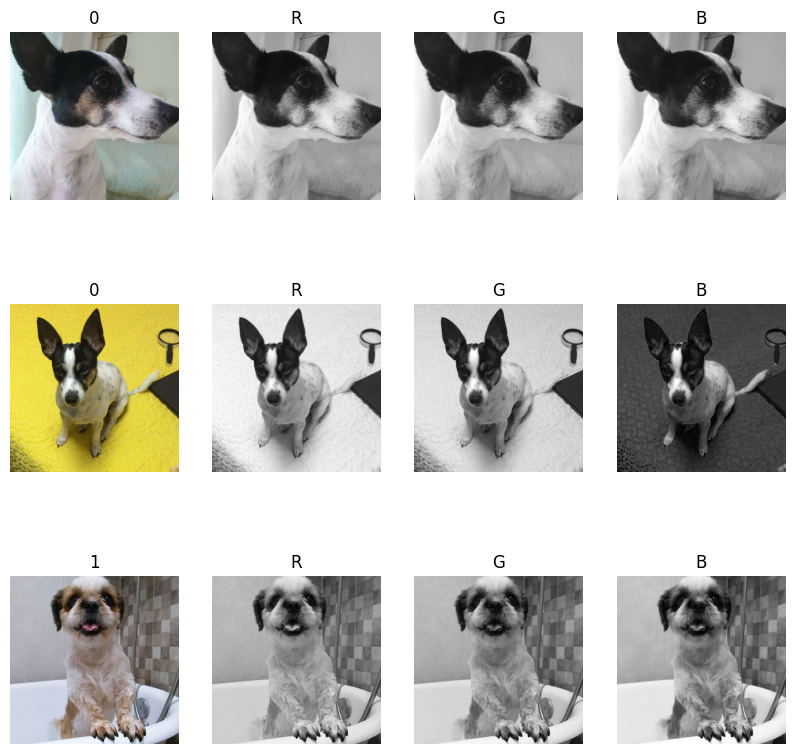

In [327]:
plt.figure(figsize=(10, 10))
loc = 0
for i in range(BATCH_SIZE):
    # display original image
    ax = plt.subplot(BATCH_SIZE, 4, loc + 1)
    img, label = original_generator.next()
    plt.imshow(img[0].astype("uint8"))
    plt.title(label[0].argmax())
    plt.axis("off")

    # display channel 1
    ax = plt.subplot(BATCH_SIZE, 4, loc + 2)
    channel_1 = img[0][..., 0]
    plt.imshow(channel_1.astype("uint8"), cmap = 'gray')
    plt.title("R")
    plt.axis("off")

    # display channel 2
    ax = plt.subplot(BATCH_SIZE, 4, loc + 3)
    channel_2 = img[0][..., 1]
    plt.imshow(channel_2.astype("uint8"), cmap = 'gray')
    plt.title("G")
    plt.axis("off")

    # display channel 3
    ax = plt.subplot(BATCH_SIZE, 4, loc + 4)
    channel_3 = img[0][..., 2]
    plt.imshow(channel_3.astype("uint8"), cmap = 'gray')
    plt.title("B")
    plt.axis("off")

    loc = loc + 4

In [149]:
'''
LAB Color space
'''
# apply preprocessing
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        preprocessing_function = lab_preprocessing,
    )
test_generator = test_datagen.flow_from_directory(TARGET_DIR,
                                                    target_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
                                                    color_mode="rgb",
                                                    batch_size=1,
                                                    seed=1,
                                                    shuffle=False,
                                                    class_mode="categorical")

Found 3 images belonging to 2 classes.


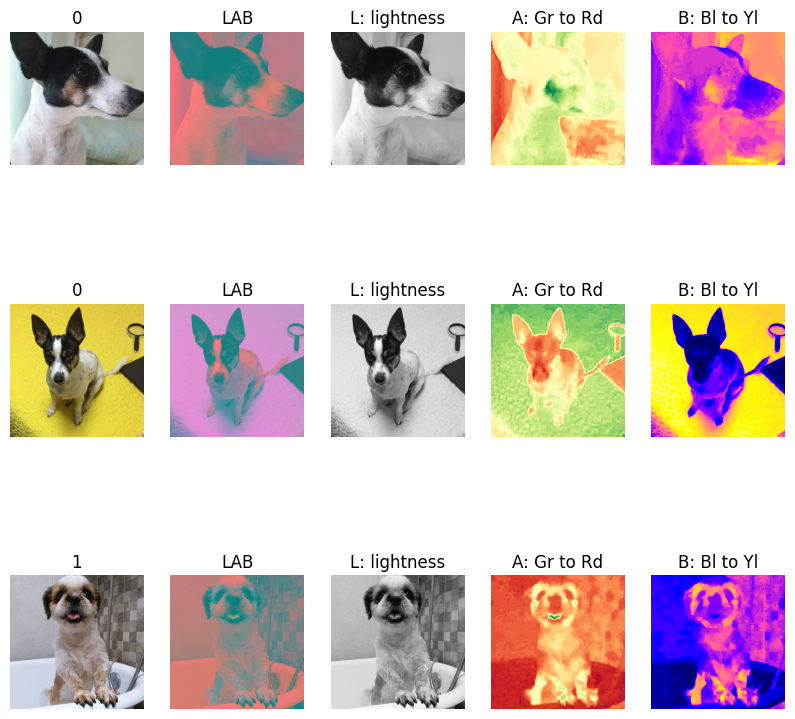

In [153]:
plt.figure(figsize=(10, 10))
loc = 0
for i in range(BATCH_SIZE):
    # display original image
    ax = plt.subplot(BATCH_SIZE, 5, loc + 1)
    img, label = original_generator.next()
    plt.imshow(img[0].astype("uint8"))
    plt.title(label[0].argmax())
    plt.axis("off")

    # display preprocessing applied image
    ax = plt.subplot(BATCH_SIZE, 5, loc + 2)
    img, label = test_generator.next()
    plt.imshow(img[0].astype("uint8"))
    plt.title("LAB")
    plt.axis("off")

    # display channel 1
    ax = plt.subplot(BATCH_SIZE, 5, loc + 3)
    channel_1 = img[0][..., 0]
    plt.imshow(channel_1.astype("uint8"), cmap = 'gray')
    plt.title("L: lightness")
    plt.axis("off")

    # display channel 2
    ax = plt.subplot(BATCH_SIZE, 5, loc + 4)
    channel_2 = img[0][..., 1]
    plt.imshow(channel_2.astype("uint8"), cmap = 'RdYlGn')
    plt.title("A: Gr to Rd") # color spectrum green to red
    plt.axis("off")

    # display channel 3
    ax = plt.subplot(BATCH_SIZE, 5, loc + 5)
    channel_3 = img[0][..., 2]
    plt.imshow(channel_3.astype("uint8"), cmap = 'gnuplot2')
    plt.title("B: Bl to Yl") # color spectrum blue to yellow
    plt.axis("off")

    loc = loc + 5

In [297]:
'''
YCrCb
'''
# apply preprocessing
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        preprocessing_function = YCrCb_preprocessing,
    )
test_generator = test_datagen.flow_from_directory(TARGET_DIR,
                                                    target_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
                                                    color_mode="rgb",
                                                    batch_size=1,
                                                    seed=1,
                                                    shuffle=False,
                                                    class_mode="categorical")

Found 3 images belonging to 2 classes.


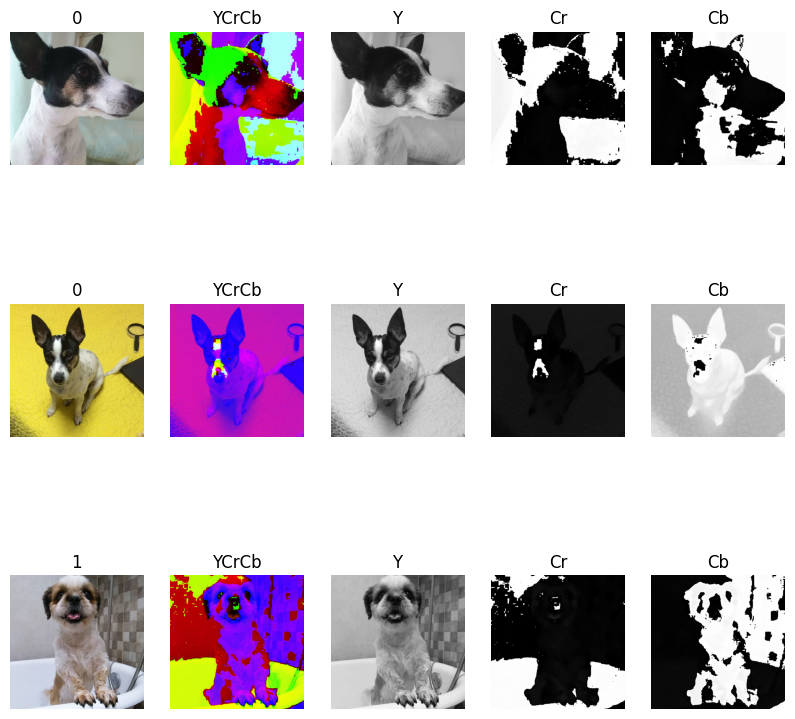

In [298]:
plt.figure(figsize=(10, 10))
loc = 0
for i in range(BATCH_SIZE):
    # display original image
    ax = plt.subplot(BATCH_SIZE, 5, loc + 1)
    img, label = original_generator.next()
    plt.imshow(img[0].astype("uint8"))
    plt.title(label[0].argmax())
    plt.axis("off")

    # display preprocessing applied image
    ax = plt.subplot(BATCH_SIZE, 5, loc + 2)
    img, label = test_generator.next()
    plt.imshow(img[0].astype("uint8"))
    plt.title("YCrCb")
    plt.axis("off")

    # display channel 1
    ax = plt.subplot(BATCH_SIZE, 5, loc + 3)
    channel_1 = img[0][..., 0]
    plt.imshow(channel_1.astype("uint8"), cmap = 'gray')
    plt.title("Y")
    plt.axis("off")

    # display channel 2
    ax = plt.subplot(BATCH_SIZE, 5, loc + 4)
    channel_2 = img[0][..., 1]
    plt.imshow(channel_2.astype("uint8"), cmap = 'gray')
    plt.title("Cr")
    plt.axis("off")

    # display channel 3
    ax = plt.subplot(BATCH_SIZE, 5, loc + 5)
    channel_3 = img[0][..., 2]
    plt.imshow(channel_3.astype("uint8"), cmap = 'gray')
    plt.title("Cb")
    plt.axis("off")

    loc = loc + 5

In [299]:
'''
HSV
'''
# apply preprocessing
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        preprocessing_function = hsv_preprocessing,
    )
test_generator = test_datagen.flow_from_directory(TARGET_DIR,
                                                    target_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
                                                    color_mode="rgb",
                                                    batch_size=1,
                                                    seed=1,
                                                    shuffle=False,
                                                    class_mode="categorical")

Found 3 images belonging to 2 classes.


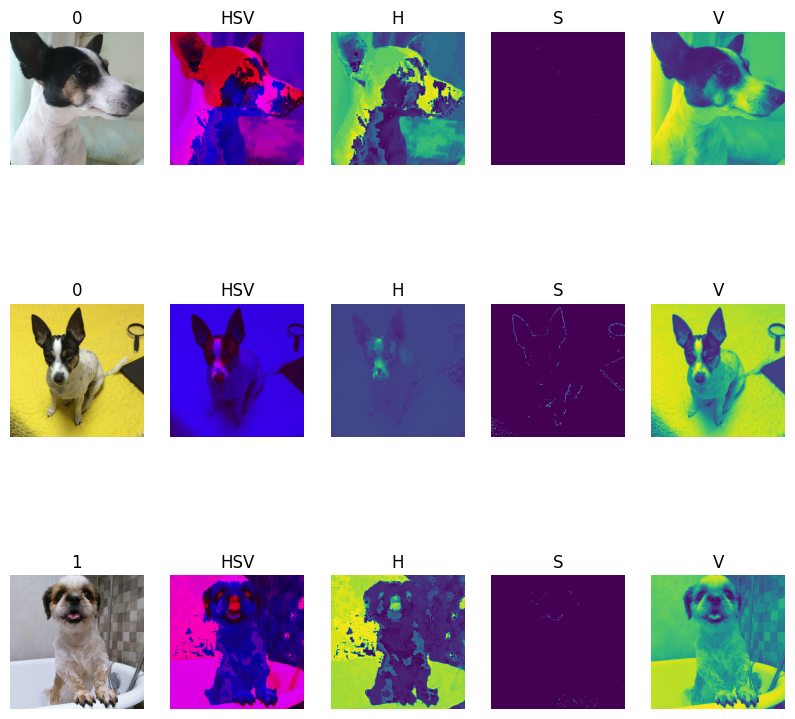

In [300]:
plt.figure(figsize=(10, 10))
loc = 0
for i in range(BATCH_SIZE):
    # display original image
    ax = plt.subplot(BATCH_SIZE, 5, loc + 1)
    img, label = original_generator.next()
    plt.imshow(img[0].astype("uint8"))
    plt.title(label[0].argmax())
    plt.axis("off")

    # display preprocessing applied image
    ax = plt.subplot(BATCH_SIZE, 5, loc + 2)
    img, label = test_generator.next()
    plt.imshow(img[0].astype("uint8"))
    plt.title("HSV")
    plt.axis("off")

    # display channel 1
    ax = plt.subplot(BATCH_SIZE, 5, loc + 3)
    channel_1 = img[0][..., 0]
    plt.imshow(channel_1.astype("uint8"))
    plt.title("H")
    plt.axis("off")

    # display channel 2
    ax = plt.subplot(BATCH_SIZE, 5, loc + 4)
    channel_2 = img[0][..., 1]
    plt.imshow(channel_2.astype("uint8"))
    plt.title("S")
    plt.axis("off")

    # display channel 3
    ax = plt.subplot(BATCH_SIZE, 5, loc + 5)
    channel_3 = img[0][..., 2]
    plt.imshow(channel_3.astype("uint8"))
    plt.title("V")
    plt.axis("off")

    loc = loc + 5

In [301]:
'''
HLS
'''
# apply preprocessing
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        preprocessing_function = hls_preprocessing,
    )
test_generator = test_datagen.flow_from_directory(TARGET_DIR,
                                                    target_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
                                                    color_mode="rgb",
                                                    batch_size=1,
                                                    seed=1,
                                                    shuffle=False,
                                                    class_mode="categorical")

Found 3 images belonging to 2 classes.


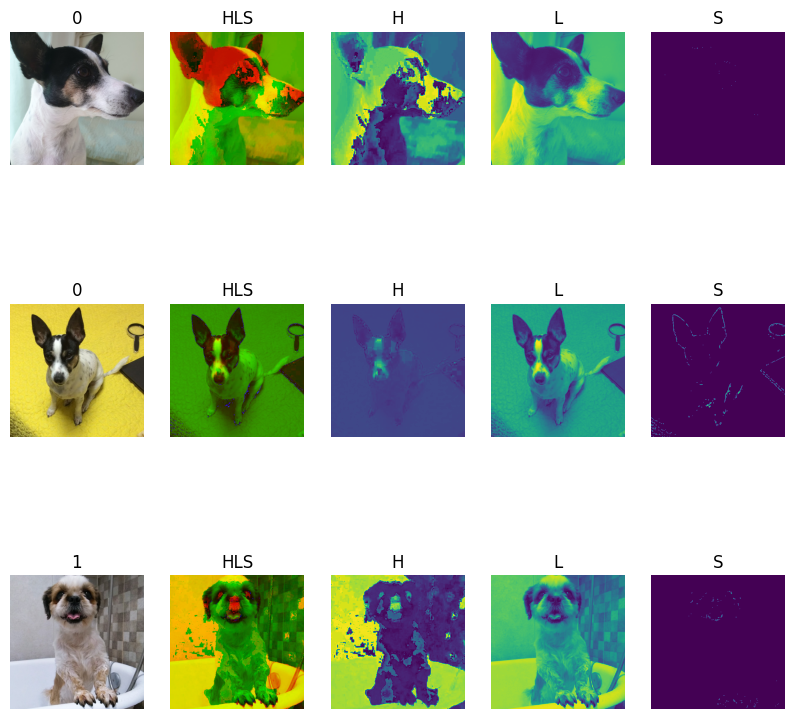

In [302]:
plt.figure(figsize=(10, 10))
loc = 0
for i in range(BATCH_SIZE):
    # display original image
    ax = plt.subplot(BATCH_SIZE, 5, loc + 1)
    img, label = original_generator.next()
    plt.imshow(img[0].astype("uint8"))
    plt.title(label[0].argmax())
    plt.axis("off")

    # display preprocessing applied image
    ax = plt.subplot(BATCH_SIZE, 5, loc + 2)
    img, label = test_generator.next()
    plt.imshow(img[0].astype("uint8"))
    plt.title("HLS")
    plt.axis("off")

    # display channel 1
    ax = plt.subplot(BATCH_SIZE, 5, loc + 3)
    channel_1 = img[0][..., 0]
    plt.imshow(channel_1.astype("uint8"))
    plt.title("H")
    plt.axis("off")

    # display channel 2
    ax = plt.subplot(BATCH_SIZE, 5, loc + 4)
    channel_2 = img[0][..., 1]
    plt.imshow(channel_2.astype("uint8"))
    plt.title("L")
    plt.axis("off")

    # display channel 3
    ax = plt.subplot(BATCH_SIZE, 5, loc + 5)
    channel_3 = img[0][..., 2]
    plt.imshow(channel_3.astype("uint8"))
    plt.title("S")
    plt.axis("off")

    loc = loc + 5

In [151]:
'''
Luv
'''
# apply preprocessing
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        preprocessing_function = luv_preprocessing,
    )
test_generator = test_datagen.flow_from_directory(TARGET_DIR,
                                                    target_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
                                                    color_mode="rgb",
                                                    batch_size=1,
                                                    seed=1,
                                                    shuffle=False,
                                                    class_mode="categorical")

Found 3 images belonging to 2 classes.


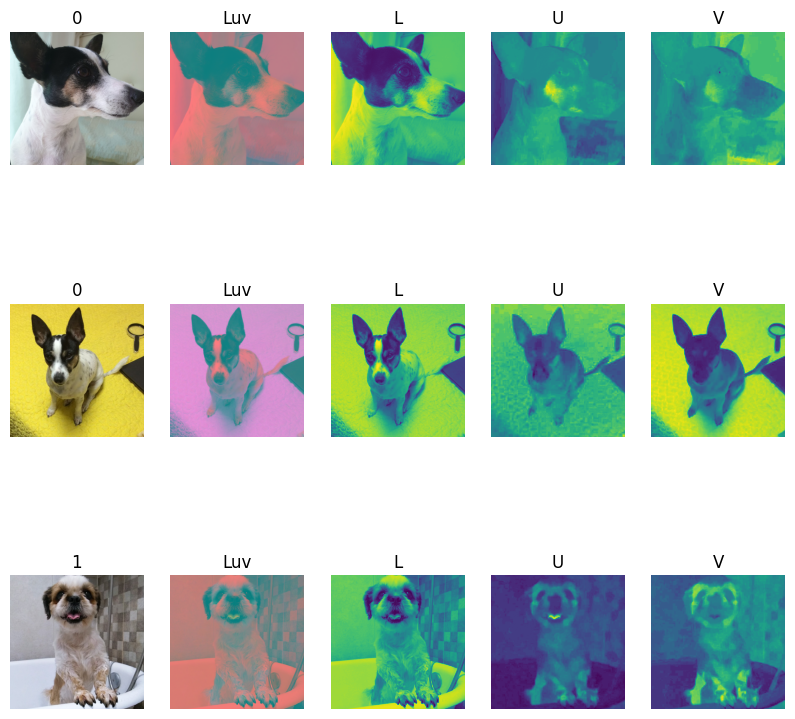

In [152]:
plt.figure(figsize=(10, 10))
loc = 0
for i in range(BATCH_SIZE):
    # display original image
    ax = plt.subplot(BATCH_SIZE, 5, loc + 1)
    img, label = original_generator.next()
    plt.imshow(img[0].astype("uint8"))
    plt.title(label[0].argmax())
    plt.axis("off")

    # display preprocessing applied image
    ax = plt.subplot(BATCH_SIZE, 5, loc + 2)
    img_t, label = test_generator.next()
    plt.imshow(img_t[0].astype("uint8"))
    plt.title("Luv")
    plt.axis("off")

    # display channel 1
    ax = plt.subplot(BATCH_SIZE, 5, loc + 3)
    channel_1 = img_t[0][..., 0]
    plt.imshow(channel_1.astype("uint8"))
    plt.title("L")
    plt.axis("off")

    # display channel 2
    ax = plt.subplot(BATCH_SIZE, 5, loc + 4)
    channel_2 = img_t[0][..., 1]
    plt.imshow(channel_2.astype("uint8"))
    plt.title("U")
    plt.axis("off")

    # display channel 3
    ax = plt.subplot(BATCH_SIZE, 5, loc + 5)
    channel_3 = img_t[0][..., 2]
    plt.imshow(channel_3.astype("uint8"))
    plt.title("V")
    plt.axis("off")

    loc = loc + 5

In [12]:
'''
Canny Edge detection
'''
# apply preprocessing
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        preprocessing_function = canny_preprocessing,
    )
test_generator = test_datagen.flow_from_directory(TARGET_DIR,
                                                    target_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
                                                    color_mode="rgb",
                                                    batch_size=1,
                                                    seed=1,
                                                    shuffle=False,
                                                    class_mode="categorical")

Found 3 images belonging to 2 classes.


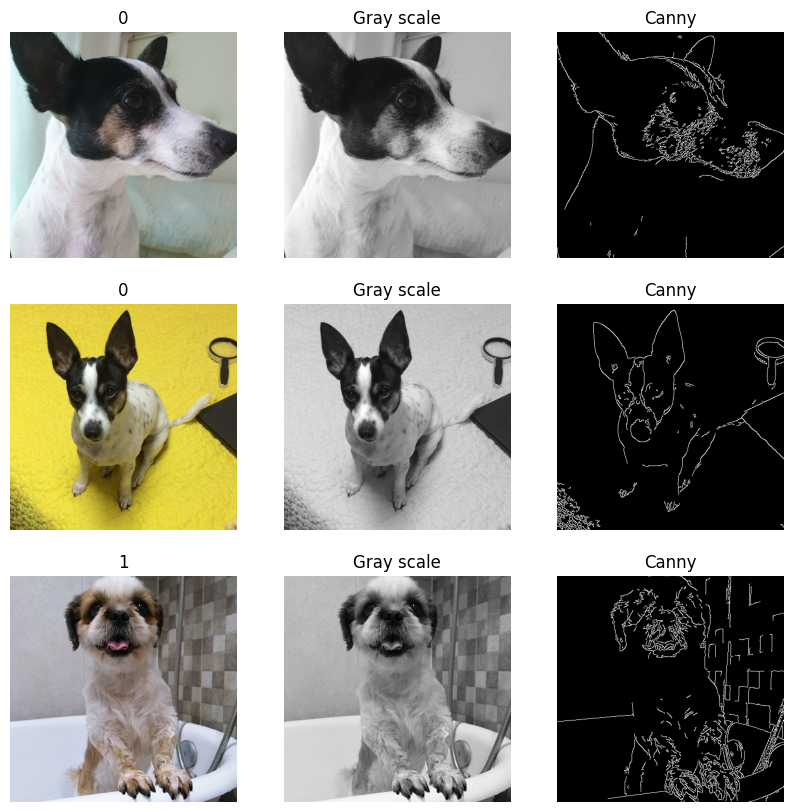

In [13]:
plt.figure(figsize=(10, 10))
loc = 0
for i in range(BATCH_SIZE):
    # display original image
    ax = plt.subplot(BATCH_SIZE, 3, loc + 1)
    img, label = original_generator.next()
    plt.imshow(img[0].astype("uint8"))
    plt.title(label[0].argmax())
    plt.axis("off")

    # display gray scaled image
    ax = plt.subplot(BATCH_SIZE, 3, loc + 2)
    img = cv2.cvtColor(img[0],cv2.COLOR_RGB2GRAY)
    plt.imshow(img,cmap = 'gray')
    plt.title("Gray scale")
    plt.axis("off")

    # display preprocessing applied image
    ax = plt.subplot(BATCH_SIZE, 3, loc + 3)
    img, label = test_generator.next()
    plt.imshow(img[0].astype("uint8"))
    plt.title("Canny")
    plt.axis("off")

    loc = loc + 3

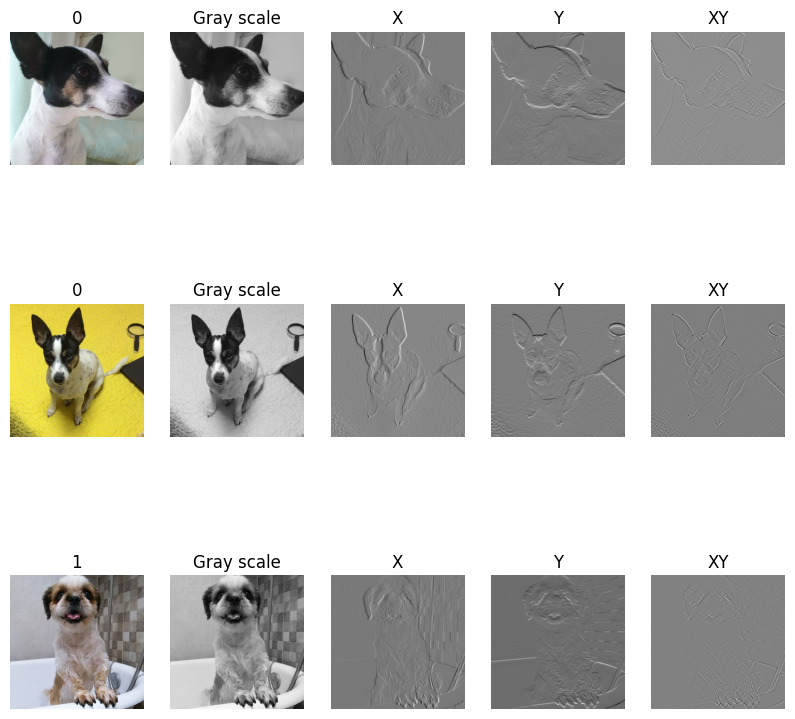

In [18]:
plt.figure(figsize=(10, 10))
loc = 0
for i in range(BATCH_SIZE):
    # display original image
    ax = plt.subplot(BATCH_SIZE, 5, loc + 1)
    img, label = original_generator.next()
    plt.imshow(img[0].astype("uint8"))
    plt.title(label[0].argmax())
    plt.axis("off")

    #apply sobel
    sobelx, sobely, sobelxy = sobel_preprocessing(img[0])

    # display gray scaled image
    ax = plt.subplot(BATCH_SIZE, 5, loc + 2)
    img = cv2.cvtColor(img[0],cv2.COLOR_RGB2GRAY)
    plt.imshow(img,cmap = 'gray')
    plt.title("Gray scale")
    plt.axis("off")

    # display sobelx image
    ax = plt.subplot(BATCH_SIZE, 5, loc + 3)
    # img = cv2.cvtColor(img[0],cv2.COLOR_RGB2GRAY)
    plt.imshow(sobelx,cmap = 'gray')
    plt.title("X")
    plt.axis("off")

    # display sobely image
    ax = plt.subplot(BATCH_SIZE, 5, loc + 4)
    # img = cv2.cvtColor(img[0],cv2.COLOR_RGB2GRAY)
    plt.imshow(sobely,cmap = 'gray')
    plt.title("Y")
    plt.axis("off")

    # display sobelxy image
    ax = plt.subplot(BATCH_SIZE, 5, loc + 5)
    # img = cv2.cvtColor(img[0],cv2.COLOR_RGB2GRAY)
    plt.imshow(sobelxy,cmap = 'gray')
    plt.title("XY")
    plt.axis("off")

    loc = loc + 5